# 1.Data Loading
- 데이터 불러오기
- 데이터 형식 파악
- 데이터 분포 파악

In [ ]:
# For GoogleDrive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
moving_data_path = '/path/to/moving_data.csv'
magnetic_data_path = '/path/to/magnetic_data.csv'

# CSV 파일 읽어오기
df_moving_origin = pd.read_csv(moving_data_path)
df_magnetic_origin = pd.read_csv(magnetic_data_path)

# Timestamp 열 제외하고 데이터프레임 생성
df_moving = df_moving_origin.iloc[:, 1:]
df_magnetic = df_magnetic_origin.iloc[:, 1:]


print("Moving Data Structure:")
print(df_moving.info())
print()
print(df_moving.head())
print()

print("Magnetic Data Struccture:")
print(df_magnetic.info())
print()
print(df_magnetic.head())

Moving Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StepCount     100 non-null    int64  
 1   MovingTime    100 non-null    int64  
 2   TurnCount     100 non-null    int64  
 3   LastRotation  100 non-null    float64
 4   Area          100 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None

   StepCount  MovingTime  TurnCount  LastRotation Area
0         42       25180          1      1.007011    A
1         33       18739          1      0.870406    A
2         33       19303          1      0.909654    A
3         43       25395          1      1.159345    A
4         40       21021          1      0.803593    A

Magnetic Data Struccture:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  

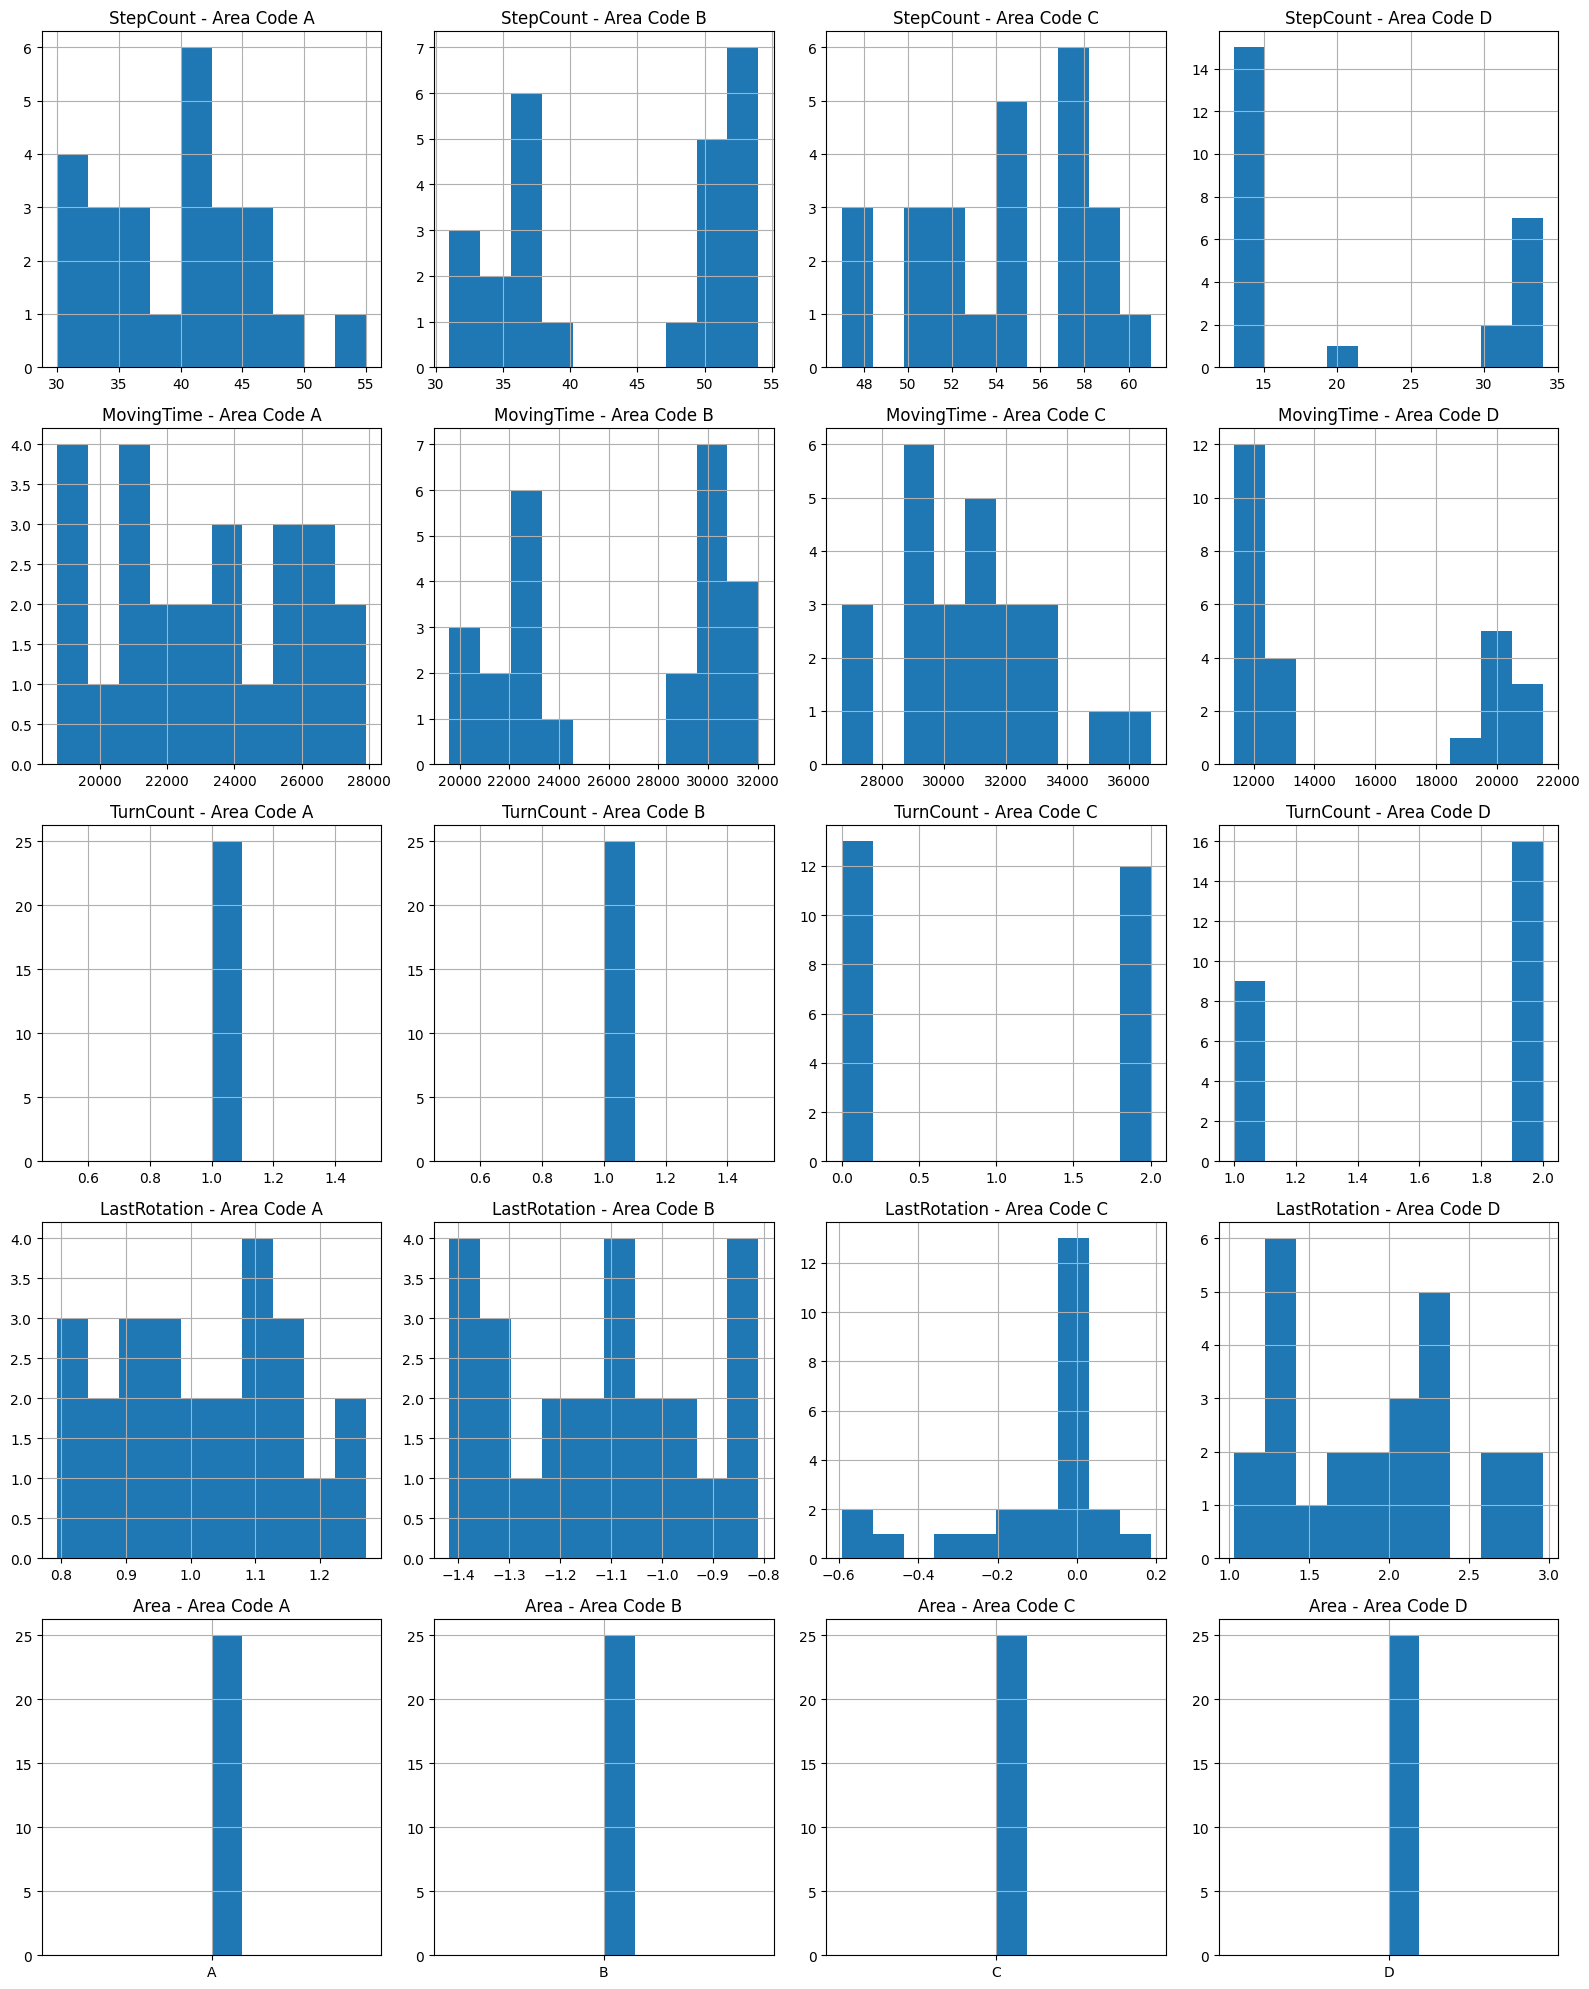

In [ ]:
## Moving Data 분포

# Area Code 별로 데이터 분리
area_codes = df_moving['Area'].unique()

# Area Code 별 데이터 분포 그래프 생성
fig, axes = plt.subplots(nrows=len(df_moving.columns), ncols=len(area_codes), figsize=(16, 4*len(df_moving.columns)))

for i, col in enumerate(df_moving.columns):
    for j, code in enumerate(area_codes) :
      df_moving.loc[df['Area'] == code, col].hist(ax=axes[i, j])
      axes[i, j].set_title(f'{col} - Area Code {code}')

plt.tight_layout()
plt.show()

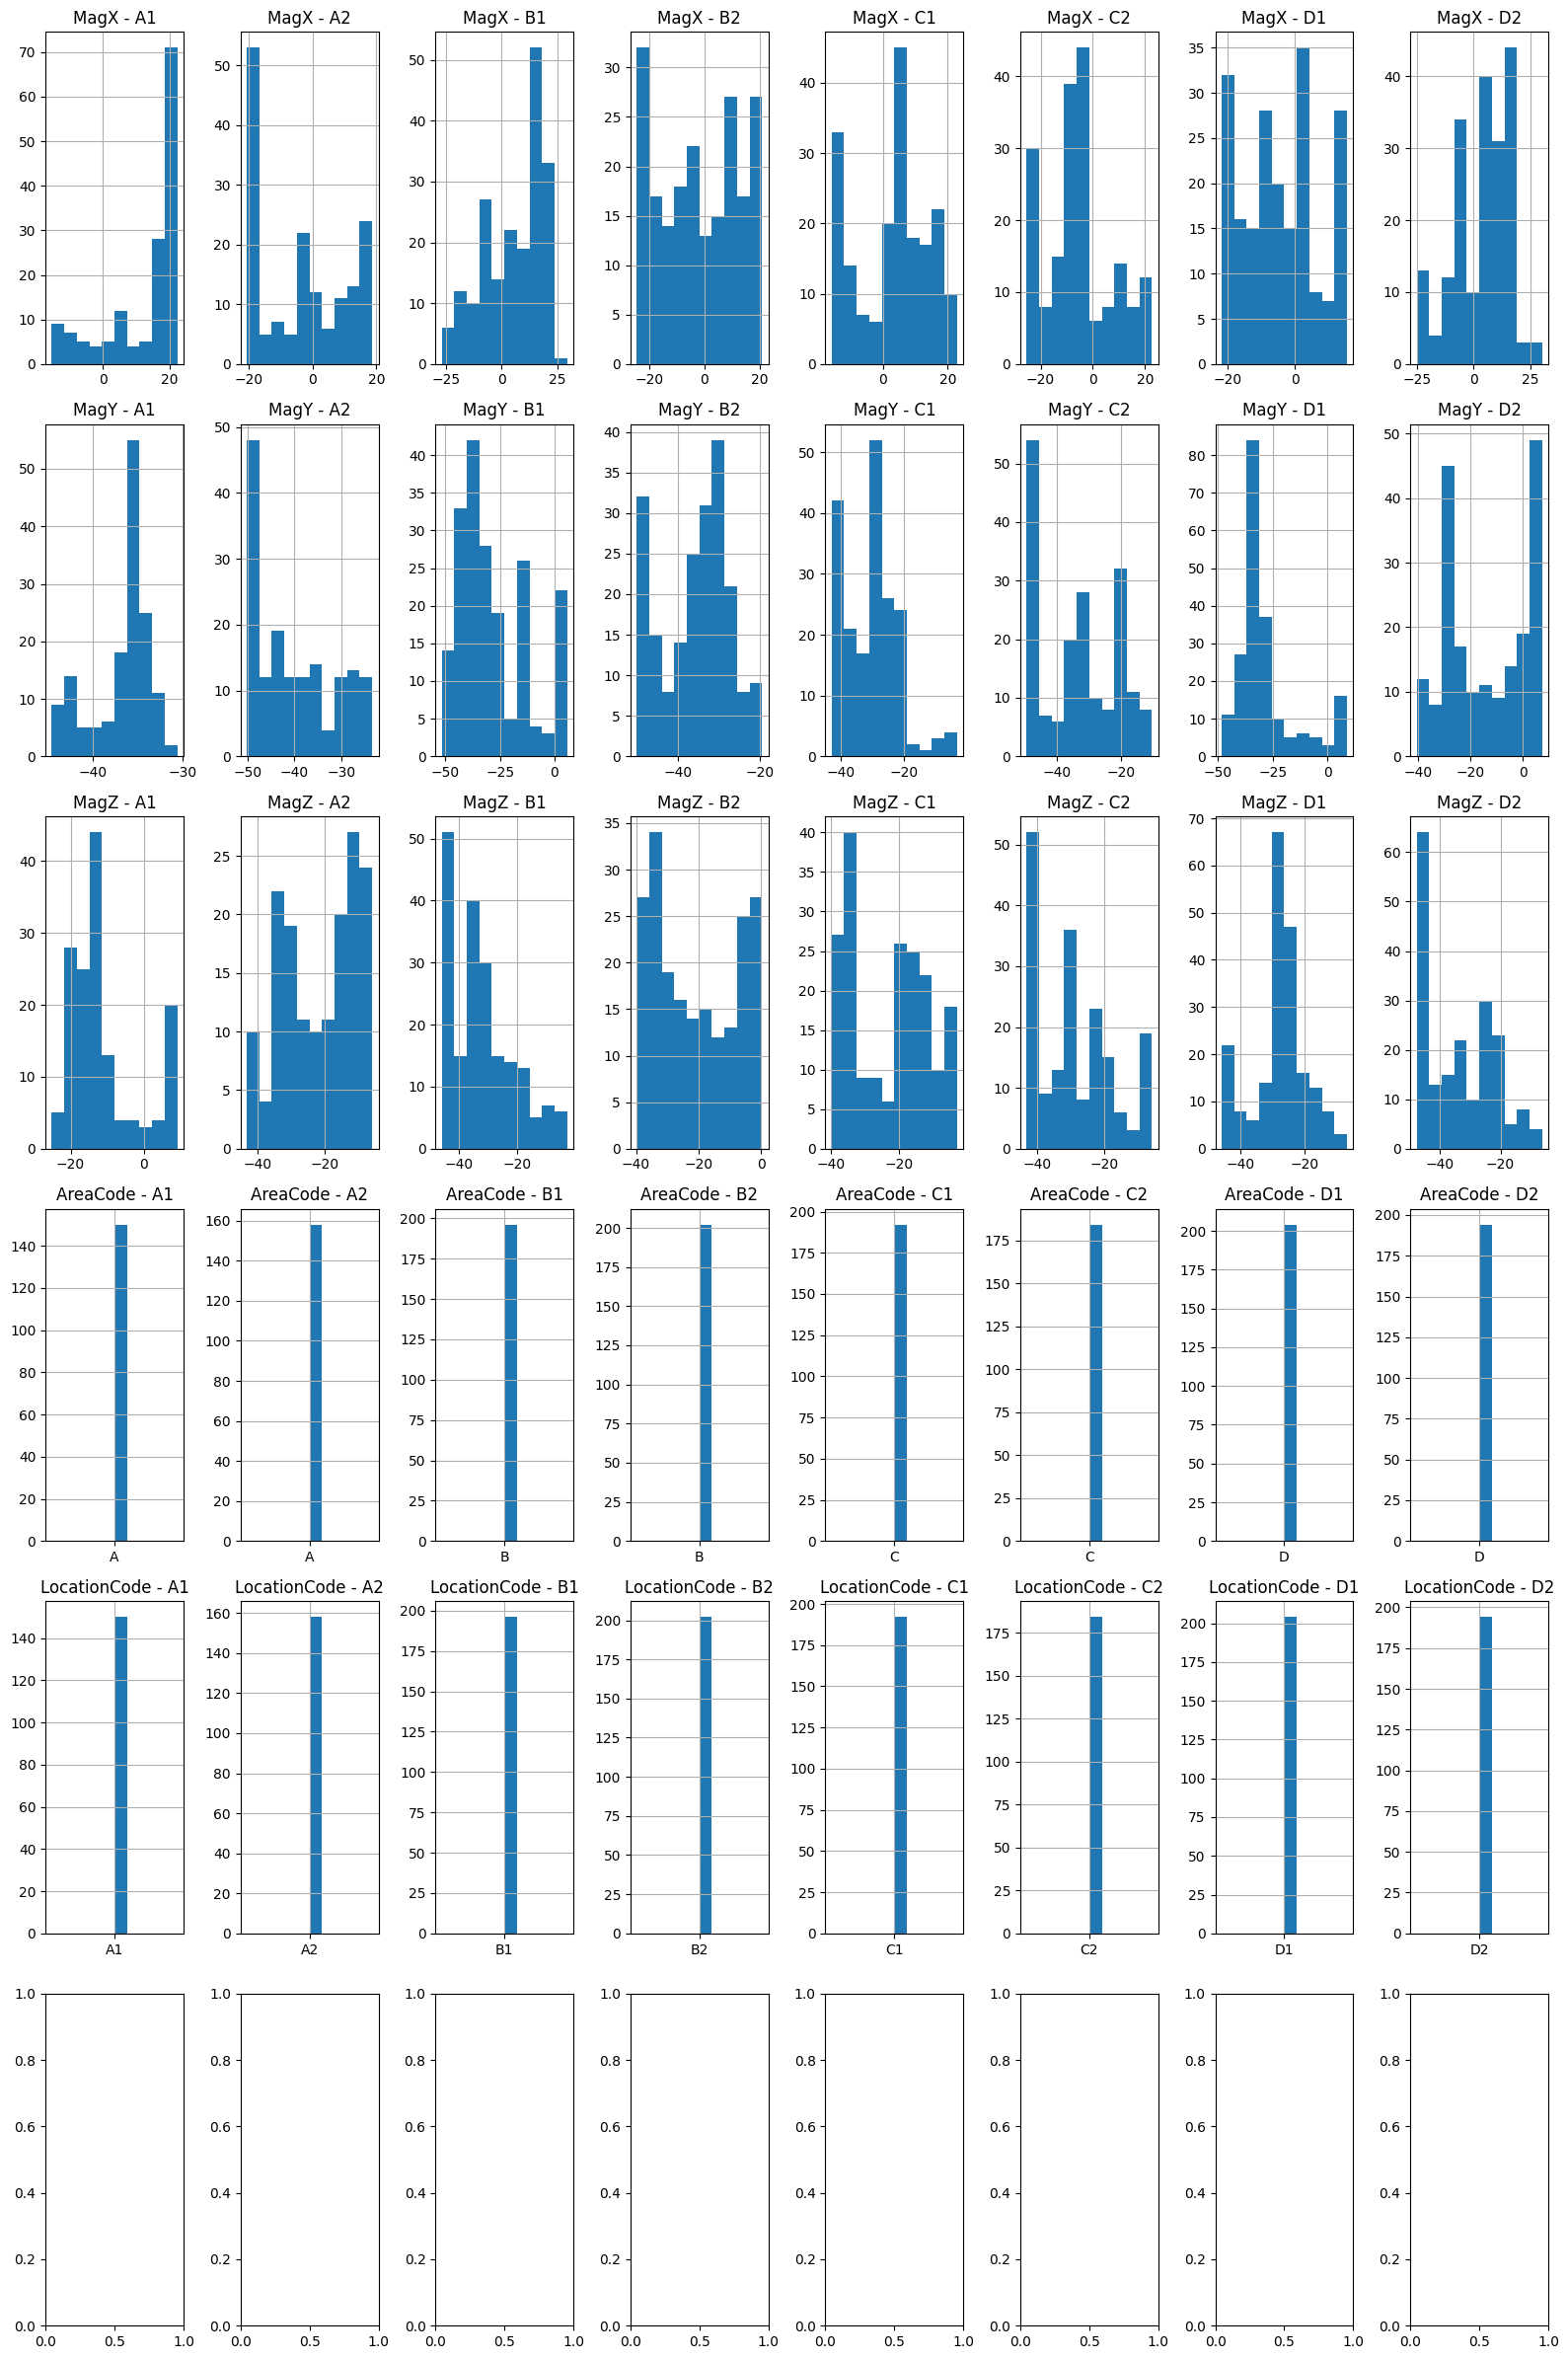

In [ ]:
## Magnetic Data 분포

# LocationCode 별로 데이터 분리
location_codes = df_magnetic['LocationCode'].unique()

# LocationCode 별 데이터 분포 그래프 생성
fig, axes = plt.subplots(nrows=len(df_magnetic_origin.columns), ncols=len(location_codes), figsize=(16, 4*len(df_magnetic_origin.columns)))

for i, col in enumerate(df_magnetic.columns):
    for j, code in enumerate(location_codes):
        df_magnetic.loc[df_magnetic_origin['LocationCode'] == code, col].hist(ax=axes[i, j])
        axes[i, j].set_title(f'{col} - {code}')

plt.tight_layout()
plt.show()


# 2.Training Libraries

In [ ]:
## Training Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# 2.Moving Data - Train & Predict The Area
- RandomForestClassifier

In [ ]:
# Data Pre-Processing
X_moving = df_moving[['StepCount', 'MovingTime', 'TurnCount', 'LastRotation']]
y_moving = df_moving['Area']

# Label Encoding
# le_moving = LabelEncoder()
# y_moving = le_moving.fit_transform(y_moving)

# Split
X_moving_train, X_moving_test, y_moving_train, y_moving_test = train_test_split(X_moving, y_moving, test_size=0.3, random_state=33)

# Model & Train
model_moving = RandomForestClassifier(n_estimators=100, random_state=33)
model_moving.fit(X_moving_train, y_moving_train)



RandomForestClassifier(random_state=33)

In [ ]:
# # Structure?
# fig_moving_tree, ax_moving_tree = plt.subplots(figsize=(20,10))
# plot_tree(model_moving)
# plt.show()


In [ ]:
# Evaluate
y_moving_pred = model_moving.predict(X_moving_test)
accuracy_moving = accuracy_score(y_moving_test, y_moving_pred)
print(f'Accuracy: {accuracy_moving:.2f}')
print("Classification Report:\n", classification_report(y_moving_test, y_moving_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           A       0.67      1.00      0.80         4
           B       1.00      1.00      1.00         7
           C       1.00      1.00      1.00         8
           D       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.96      0.93      0.94        30



# 3.Magnetic Data - Train & Predict The Specific Location
- RandomForestClassifier

In [ ]:
# Data Pre-Processing
X_magnetic = df_magnetic[['MagX', 'MagY', 'MagZ', 'AreaCode']]
y_magnetic = df_magnetic['LocationCode']

# Label Encoding
X_magnetic = pd.get_dummies(X_magnetic, columns=['AreaCode'])

# Split
X_magnetic_train, X_magnetic_test, y_magnetic_train, y_magnetic_test = train_test_split(X_magnetic, y_magnetic, test_size=0.3, random_state=45)

# Model & Train
model_magnetic = RandomForestClassifier(n_estimators=100, random_state=45)
model_magnetic.fit(X_magnetic_train, y_magnetic_train)


RandomForestClassifier(random_state=45)

In [ ]:
# Evaluate
y_magnetic_pred = model_magnetic.predict(X_magnetic_test)
accuracy_magnetic = accuracy_score(y_magnetic_test, y_magnetic_pred)
print(f'Accuracy: {accuracy_magnetic:.2f}')
print("Classification Report:\n", classification_report(y_magnetic_test, y_magnetic_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

          A1       1.00      0.94      0.97        50
          A2       0.94      1.00      0.97        45
          B1       0.87      0.91      0.89        53
          B2       0.92      0.89      0.90        63
          C1       0.95      1.00      0.98        63
          C2       1.00      0.95      0.97        56
          D1       0.86      0.88      0.87        58
          D2       0.87      0.86      0.86        56

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444

